##<center>  Escape Time Algorithm for Plotting Julia Set</center>##

Let $f_c:\mathbb{C}\to\mathbb{C}$ be the complex function defined by $f_c(z)=z^2+c$, where $c\in\mathbb{C}$ is a constant.  Iterating this function we get a sequence $z_n=f_c^n(z)$, $n\geq 1$,
called the orbit of the point $z$..

Dropping the subscript $c$ we have:

$f^2(z)=f(f(z))=f(z^2+c)=(z^2+c)^2+c=z^4+2z^2c+c^2+c$

$f^3(z)=f(f^2(z))=(z^4+2z^2c+c^2+c)^2+c$

$\vdots$

A sequence $z_n$ tends to infinity if for each fixed $r>0$, there is an $N>0$ such that the modulus  $|z_n|>r$,
for every $n>N$.

The set of points $z$ in the complex plane, for which the sequence $z_n=f_c^n(z)$ converges to $\infty$
is called the region or basin of attraction of $\infty$.

The  Julia set $J_c$ is the boundary of the region of attraction of $\infty$.


A few properties of the map $f_c$ and its Julia set  [[R Devaney, Introduction to Chaotic Dynamical Systems](http://www.amazon.com/Introduction-Chaotic-Dynamical-Systems-Edition/dp/0813340853)]:
    
    
- If $|z|> \max(2, |c|)$, then  its orbit converges to $\infty$,  $z_n\to\infty$.
Hence the Julia set  $J_c$  is included in the disk, $D(0; r=\max(2,|c|))$.

- From the  symmetry-properties of the map $f_c$ it follows that its Julia set $J_c$ is symmetric with respect  to origin.

In [49]:
%matplotlib inline

In [50]:
import matplotlib.pyplot as plt
import numpy as np


The  function `Julia` implements the so called Escape Time Algorithm for an orbit (sequence) $(z_n)$.

To each $z\in\mathbb{C}$  one associates the time $t=n$ for which
$|z_n|\leq 4$, and $|z_{n+1}|>4$.

In [38]:
def   Julia(z,c, Miter=80):#Miter, maximum number of allowed iterations 
    for n in range(Miter):
        z = z*z + c
        if  abs(z)>4.0:
            break
            pass
        pass
    return n

We define a meshgrid over the rectangle $[-1.5,1.5]\times[-1.5, 1.5]$, and generate the image of the Julia set included in this rectangle, corresponding succesively to a constants c in the following  list:

In [44]:
C=[-0.04-0.684*1j, -0.8+0.156*1j, -0.4+0.6*1j,-0.04-1j*0.668 , -0.835-0.2321*1j, -0.70176-0.3842*1j]+\
[0.300283+0.48857*1j, -0.1+0.651]#-0.74543+0.11301*1j

In [48]:
Nx=1000
Ny=1000
a=1.5
x=np.linspace(-a, a, Nx)
y=np.linspace(-a, a, Ny)
x,y=np.meshgrid(x,y)
z=x+1j*y


Given $c\in C$, we generate the image
associated to the `numpy.array` having as elements the escape times of the nodes $z[I][J]$,
$I, J=\overline{0,999}$ in this meshgrid. For each image we choose a [colormap](http://matplotlib.org/users/colormaps.html) from this list: 

In [52]:
cmp=['RdGy', 'cubehelix', 'gnuplot', 'gist_heat', 'gist_earth','terrain']+\
['RdGy', 'cubehelix']

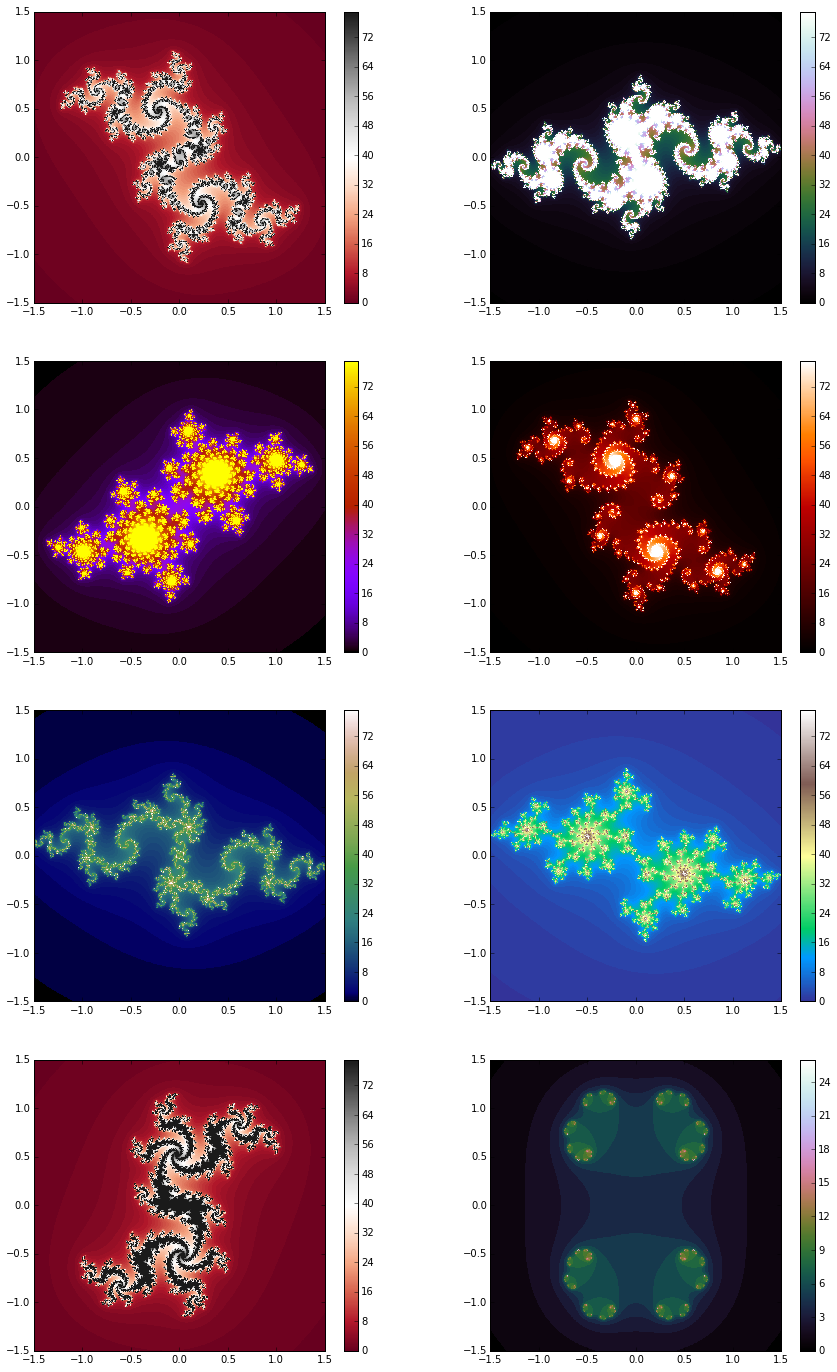

In [47]:
fig = plt.figure(figsize=(15,24))
splot = 420
for k in range(8):
    splot+=1
    ax = fig.add_subplot(splot)
    img=np.array([Julia (z[I,J], C[k])    for I in range(Ny)    for J in range(Nx)]).reshape(Ny, Nx)
    im=ax.imshow(img, cmap=cmp[k], extent=[-1.5, 1.5, -1.5, 1.5], interpolation="nearest")
    fig.colorbar(im, ax=ax)

Emilia Petrisor,   03/04/2015

In [53]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()